Import Necessary Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate


 Prepare the Dataset

In [21]:
# Load the dataset
df = pd.read_csv('df_model.csv')

#print the coluns
print(df.columns)

# Separating features and target variable
X = df.drop(columns=['loan_status'])  # Drop the target column
y = df['loan_status']                # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_age_bins_25-30',
       'person_age_bins_30-40', 'person_age_bins_40-70',
       'credit_score_category_Fair', 'credit_score_category_Good',
       'credit_score_category_Very Good', 'credit_score_category_Excellent'],
      dtype='object')


Logistic Regression from Scratch

Define Sigmoid Function

In [22]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Initialize Weights and Bias

In [23]:
# Initialize weights and bias
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias


Define Loss and Gradient Descent

In [24]:
# Compute loss and gradients
def compute_loss_and_gradients(X, y, weights, bias):
    n_samples = X.shape[0]
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    
    # Compute loss (Binary Cross Entropy)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    
    # Gradients
    dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
    db = (1 / n_samples) * np.sum(predictions - y)
    
    return loss, dw, db


Optimize Weights Using Gradient Descent

In [25]:
# Gradient Descent Optimization
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    for i in range(epochs):
        loss, dw, db = compute_loss_and_gradients(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if i % 100 == 0:  # Print loss every 100 epochs
            print(f"Epoch {i}, Loss: {loss}")
    
    return weights, bias


Train the Logistic Regression Model

In [26]:
# Train the logistic regression model
def train_logistic_regression(X, y, learning_rate=0.01, epochs=100):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)
    weights, bias = gradient_descent(X, y, weights, bias, learning_rate, epochs)
    return weights, bias

# Convert y_train to numpy array for compatibility
y_train = y_train.values

# Train the model
weights, bias = train_logistic_regression(X_train, y_train, learning_rate=0.01, epochs=100)


Epoch 0, Loss: 0.6931471805599453


Make Predictions

In [27]:
# Make predictions
def predict(X, weights, bias, threshold=0.5):
    linear_model = np.dot(X, weights) + bias
    probabilities = sigmoid(linear_model)
    return [1 if p >= threshold else 0 for p in probabilities]

y_pred_scratch = predict(X_test, weights, bias)


Evaluate Model

Accuracy (from scratch): 0.4587084583750139
Confusion Matrix:
 [[2428 4559]
 [ 311 1699]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.35      0.50      6987
           1       0.27      0.85      0.41      2010

    accuracy                           0.46      8997
   macro avg       0.58      0.60      0.46      8997
weighted avg       0.75      0.46      0.48      8997



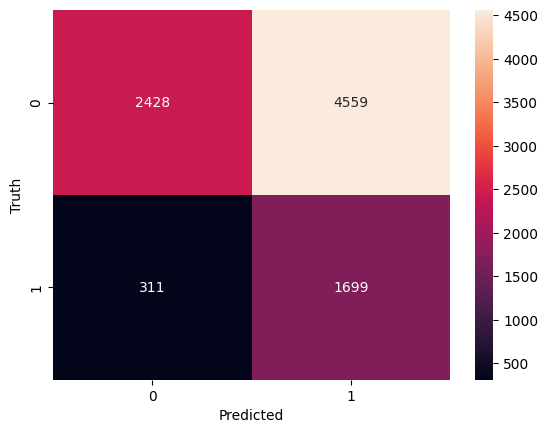

In [45]:
# Evaluate performance
print("Accuracy (from scratch):", accuracy_score(y_test, y_pred_scratch))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scratch))
print("Classification Report:\n", classification_report(y_test, y_pred_scratch))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_scratch)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



Logistic Regression with Scikit-Learn

Train the Model

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Make Predictions

In [30]:
# Make predictions
y_pred_sklearn = logreg.predict(X_test)


Evaluate Model

Accuracy (sklearn): 0.8887406913415583
Confusion Matrix:
 [[6485  502]
 [ 499 1511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6987
           1       0.75      0.75      0.75      2010

    accuracy                           0.89      8997
   macro avg       0.84      0.84      0.84      8997
weighted avg       0.89      0.89      0.89      8997



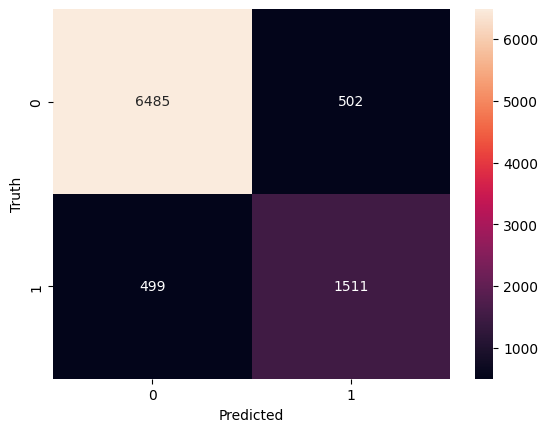

In [46]:
# Evaluate performance
print("Accuracy (sklearn):", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))
print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Combined Matrix


Combined Metrics:
                 Metric   Sklearn  Scratch
0              Accuracy  0.888741     0.85
1  Precision (Negative)  0.928551     0.83
2  Precision (Positive)  0.750621     0.88
3     Recall (Negative)  0.928152     0.91
4     Recall (Positive)  0.751741     0.78
5   F1-Score (Negative)  0.928352     0.87
6   F1-Score (Positive)  0.751181     0.82


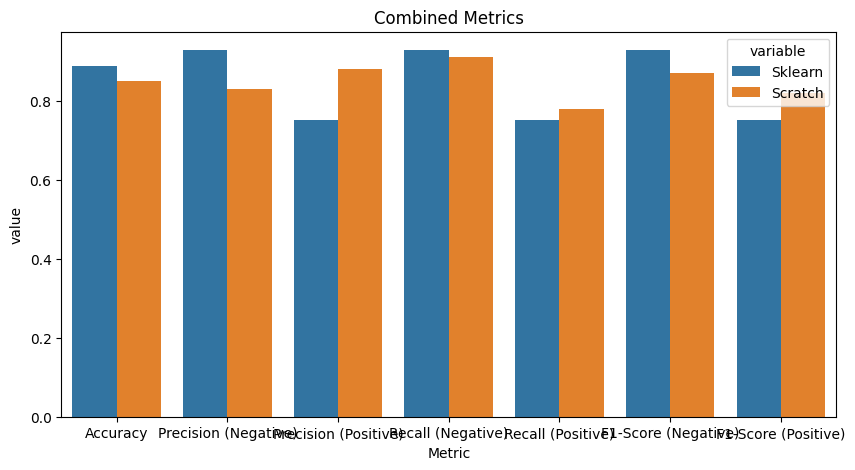

In [48]:
# Create a combined table for sklearn and scratch metrics
combined_metrics = {
    'Metric': ['Accuracy', 'Precision (Negative)', 'Precision (Positive)', 'Recall (Negative)', 'Recall (Positive)', 'F1-Score (Negative)', 'F1-Score (Positive)'],
    'Sklearn': [accuracy_sklearn, class_report_df.loc['0', 'precision'], class_report_df.loc['1', 'precision'], class_report_df.loc['0', 'recall'], class_report_df.loc['1', 'recall'], class_report_df.loc['0', 'f1-score'], class_report_df.loc['1', 'f1-score']],
    'Scratch': [accuracy_scratch, class_report_scratch_df.loc['Negative', 'precision'], class_report_scratch_df.loc['Positive', 'precision'], class_report_scratch_df.loc['Negative', 'recall'], class_report_scratch_df.loc['Positive', 'recall'], class_report_scratch_df.loc['Negative', 'f1-score'], class_report_scratch_df.loc['Positive', 'f1-score']]
}
combined_metrics_df = pd.DataFrame(combined_metrics)

# Print combined metrics table
print("\nCombined Metrics:")
print(combined_metrics_df)

#plot the combined metrics
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(combined_metrics_df, ['Metric']))
plt.title("Combined Metrics")
plt.show()



Regularization

In [33]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=1.0)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=1.0)

log_reg_l1.fit(X_train, y_train)
log_reg_l2.fit(X_train, y_train)

print("L1 Regularization Accuracy:", log_reg_l1.score(X_test, y_test))
print("L2 Regularization Accuracy:", log_reg_l2.score(X_test, y_test))


L1 Regularization Accuracy: 0.794487051239302
L2 Regularization Accuracy: 0.7897076803378904


Threshold Tuning

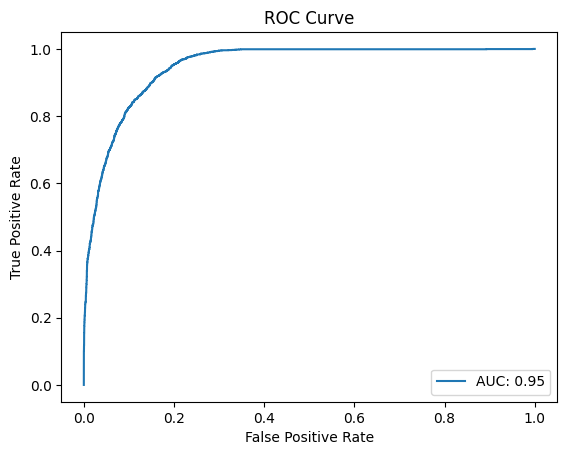

In [34]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Adjust threshold
custom_threshold = 0.6
y_pred_custom = (y_probs >= custom_threshold).astype(int)


Hyper Parameter Tuing

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a parameter grid for regularization strength
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers that support all penalties
}

# Initialize logistic regression and GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8963818859877362
